# Report: Emiliano Martinez

He is a goal keeper of Argentina. I think He is key person for Argentina to win in WorldCup2022.
So I decided to look into him till the competition. This is First Report.



In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import csv
import pathlib
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
%matplotlib inline

from math import pi

## 1. Get Data 

In [3]:
# url = 'https://fbref.com/en/players/7956236f/Emiliano-Martinez'
# html = requests.get(url)
# soup = BeautifulSoup(html.content, 'html.parser')
# table = soup.select('table')
# tbody_list = []
# for _table in table:
#     tbody_list.append(_table.tbody)
    
# seasons = tbody_list[0](attrs={'data-stat':'season'})
# season_list = []
# for season in seasons:
#     season_list.append(season.text)
    
# games =  tbody_list[0](attrs={'data-stat':'games_gk'})
# game_list = []
# for game in games:
#     game_list.append(game.text)
    
# starts = tbody_list[0](attrs={'data-stat':'games_starts_gk'})
# start_list = []
# for start in starts:
#     start_list.append(start.text)

# minutes = tbody_list[0](attrs={'data-stat':'minutes_gk'})
# minute_list = []
# for minute in minutes:
#     minute_list.append(minute.text)

# againsts = tbody_list[0](attrs={'data-stat':'goals_against_gk'})
# against_list = []
# for against in againsts:
#     against_list.append(against.text)
    
# against90s = tbody_list[0](attrs={'data-stat':'goals_against_per90_gk'})
# against90_list = []
# for against90 in against90s:
#     against90_list.append(against90.text)
    
# shots_on_tgts = tbody_list[0](attrs={'data-stat':'shots_on_target_against'})
# shots_on_tgt_list = []
# for shots_on_tgt in shots_on_tgts:
#     shots_on_tgt_list.append(shots_on_tgt.text)
    
# saves = tbody_list[0](attrs={'data-stat':'saves'})
# save_list = []
# for save in saves:
#     save_list.append(save.text)
    
# save_pcts = tbody_list[0](attrs={'data-stat':'save_pct'})
# save_pct_list = []
# for save_pct in save_pcts:
#     save_pct_list.append(save_pct.text)

# clean_sheets = tbody_list[0](attrs={'data-stat':'clean_sheets'})
# clean_sheet_list = []
# for clean_sheet in clean_sheets:
#     clean_sheet_list.append(clean_sheet.text)
    
# clean_sheets_pcts = tbody_list[0](attrs={'data-stat':'clean_sheets_pct'})
# clean_sheet_pct_list = []
# for clean_sheet_pct in clean_sheets_pcts:
#     clean_sheet_pct_list.append(clean_sheet_pct.text)
    
# if not pathlib.Path('../assets/argen').is_dir():
#     pathlib.Path('../assets/argen').mkdir()
# with open('../assets/argen/emiliano_martinez.csv', 'w') as csv_file:
#     fieldnames = ['Season','Game','Start','Minute','Against', 'Against90', 'Sot', 'Saves', 'Save %', 'Clean-sheet', 'Clean-sheet %']
#     writer = csv.DictWriter(csv_file,fieldnames=fieldnames)
#     writer.writeheader()
#     for season, game, start, minute,against,against90, sot, save, saveper,clean_sheet,clean_sheetper in zip(season_list, game_list, start_list, minute_list, against_list, against90_list, shots_on_tgt_list, save_list, save_pct_list,clean_sheet_list, clean_sheet_pct_list):
#         writer.writerow({'Season': season, 'Game': game, 'Start':start, 'Minute': minute, 'Against': against, 'Against90':against90, 'Sot':sot,  'Saves':save, 'Save %':saveper, 'Clean-sheet':clean_sheet, 'Clean-sheet %':clean_sheetper})   

## 2. Process Data

In [30]:
emi_stats = pd.read_csv('../assets/argen/emiliano_martinez.csv')
emi_stats = emi_stats.fillna(0)

emi_stats.loc[0, 'Season'] = '11-12'
emi_stats.loc[1, 'Season'] = '12-13'
emi_stats.loc[2, 'Season'] = '13-14'
emi_stats.loc[3, 'Season'] = '14-15'
emi_stats.loc[4, 'Season'] = '14-15'

emi_stats.loc[5, 'Season'] = '15-16'
emi_stats.loc[6, 'Season'] = '16-17'
emi_stats.loc[7, 'Season'] = '16-17'
emi_stats.loc[8, 'Season'] = '17-18'
emi_stats.loc[9, 'Season'] = '18-19'
emi_stats.loc[10, 'Season'] = '18-19'
emi_stats.loc[11, 'Season'] = '19-20'
emi_stats.loc[12, 'Season'] = '20-21'



emi = emi_stats.drop('Season', axis=1)
emi= emi.replace(',','.', regex=True).astype(float)
emi['Season'] = emi_stats['Season']
emi.iloc[5, 2] = 1136.00
emi.iloc[9, 2] = 1620.00
emi.columns.tolist()
emi = emi.reindex(columns=[
 'Season',
 'Game',
 'Start',
 'Minute',
 'Against',
 'Against90',
 'Sot',
 'Saves',
 'Save %',
 'Clean-sheet',
 'Clean-sheet %',
])
emi

,Season,Game,Start,Minute,Against,Against90,Sot,Saves,Save %,Clean-sheet,Clean-sheet %
0,11-12,1.0,1.0,90.0,3.0,3.00,6.0,3.0,0.500,0.0,0.0
1,12-13,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0
2,13-14,11.0,11.0,990.0,14.0,1.27,48.0,34.0,0.708,2.0,18.2
3,14-15,4.0,3.0,302.0,4.0,1.19,8.0,4.0,0.500,2.0,66.7
4,14-15,8.0,8.0,720.0,10.0,1.25,33.0,23.0,0.697,2.0,25.0
5,15-16,13.0,13.0,1136.0,17.0,1.35,59.0,42.0,0.712,4.0,30.8
6,16-17,3.0,3.0,270.0,0.0,0.00,0.0,0.0,0.000,1.0,33.3
7,16-17,2.0,2.0,180.0,3.0,1.50,8.0,5.0,0.750,1.0,50.0
8,17-18,5.0,5.0,450.0,7.0,1.40,19.0,13.0,0.684,2.0,40.0
9,18-19,18.0,18.0,1620.0,23.0,1.28,97.0,75.0,0.773,5.0,27.8


In [58]:
df = pd.read_csv('/work/assets/position/gk/Emiliano-Martinez.csv')
df = df.fillna(0)
df['Season'] = emi['Season']


In [59]:
emi2 = df.drop([
 'Game',
 'Start',
 'Minute',
 'Against',
 'Against90',
 'Sot',
 'Saves',
 'Save %',
 'Clean-sheet',
 'Clean-sheet %'], axis=1)
emi2

,Season,Psxg,Psnpxg,Net,Netper,Launch,Plaunch,Length,Gklength,Plengthave,Cross,CStop,Outside,Distance
0,11-12,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,12-13,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,13-14,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,14-15,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,14-15,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
5,15-16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
6,16-17,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
7,16-17,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
8,17-18,6.4,0.29,-0.6,-0.11,40.9,82.2,59.6,73.0,59.6,51.0,13.7,0.60,13.9
9,18-19,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [60]:
# sns.pairplot(emi2)

In [69]:
leno = pd.read_csv('/work/assets/position//gk/Bernd-Leno.csv')
leno = leno.fillna(0)

In [70]:
leno['Season'] = emi['Season']
leno['Minute'] = leno['Minute'].replace(',','.', regex=True).astype(float)
leno.iloc[2, 3] = 0.27
leno.iloc[12, 3] = 0.72
leno['Minute'] = leno['Minute'] * 1000
leno

,Season,Game,Start,Minute,Against,Against90,Sot,Saves,Save %,Clean-sheet,...,Netper,Launch,Plaunch,Length,Gklength,Plengthave,Cross,CStop,Outside,Distance
0,11-12,17,17,1530.0,18,1.06,71,53,0.746,7,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,12-13,37,37,3330.0,46,1.24,134,88,0.657,8,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,13-14,3,3,270.0,3,1.00,13,10,0.769,1,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,14-15,33,33,2970.0,42,1.27,137,95,0.693,11,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,14-15,32,32,2880.0,34,1.06,112,78,0.696,11,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
5,15-16,34,34,3060.0,41,1.21,146,105,0.719,7,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
6,16-17,34,34,3060.0,37,1.09,116,79,0.681,16,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
7,16-17,33,33,2970.0,38,1.15,134,96,0.716,13,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
8,17-18,34,34,3060.0,55,1.62,160,105,0.675,6,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
9,18-19,33,33,2970.0,40,1.21,104,68,0.663,10,...,-0.17,37.4,44.6,38.8,50.6,38.8,223.0,5.4,0.97,18.0


In [71]:
emi.set_index('Season')


,Game,Start,Minute,Against,Against90,Sot,Saves,Save %,Clean-sheet,Clean-sheet %
Season,,,,,,,,,,
11-12,1.0,1.0,90.0,3.0,3.00,6.0,3.0,0.500,0.0,0.0
12-13,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0
13-14,11.0,11.0,990.0,14.0,1.27,48.0,34.0,0.708,2.0,18.2
14-15,4.0,3.0,302.0,4.0,1.19,8.0,4.0,0.500,2.0,66.7
14-15,8.0,8.0,720.0,10.0,1.25,33.0,23.0,0.697,2.0,25.0
15-16,13.0,13.0,1136.0,17.0,1.35,59.0,42.0,0.712,4.0,30.8
16-17,3.0,3.0,270.0,0.0,0.00,0.0,0.0,0.000,1.0,33.3
16-17,2.0,2.0,180.0,3.0,1.50,8.0,5.0,0.750,1.0,50.0
17-18,5.0,5.0,450.0,7.0,1.40,19.0,13.0,0.684,2.0,40.0


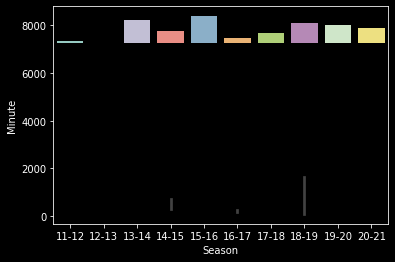

In [72]:
sns.barplot(x='Season', y='Minute', data=emi, bottom=emi['Minute'].sum())

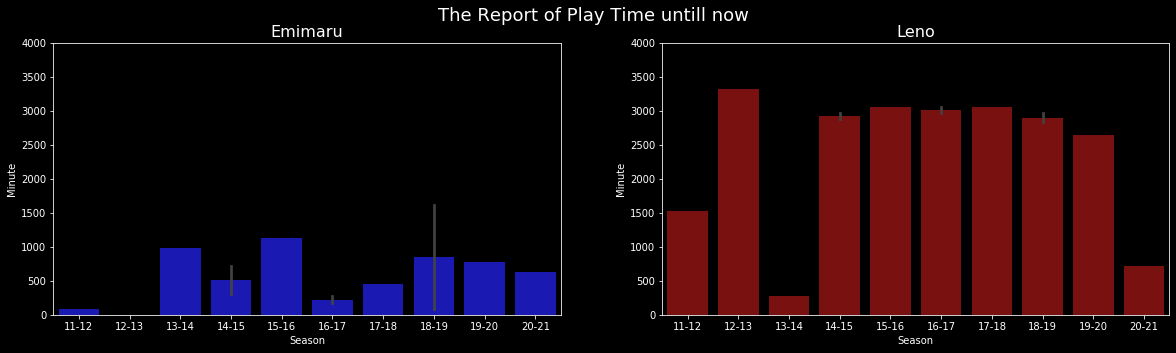

In [73]:

# sns.set(style="ticks")
plt.style.use(['dark_background'])

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))
fig.suptitle('The Report of Play Time untill now',color='w', fontsize=18)

axes[0].set_ylim(0, 4000)
axes[1].set_ylim(0, 4000)

axes[0].set_title('Emimaru',fontsize=16)
axes[1].set_title('Leno',fontsize=16)

sns.barplot(ax=axes[0], x=emi['Season'], y=emi['Minute'], color='mediumblue')
sns.barplot(ax=axes[1], x=leno['Season'], y=leno['Minute'], color="darkred")

fig.savefig('emi_leno_time.png')
# from matplotlib.backends.backend_pdf import PdfPages
# pdf = PdfPages('')

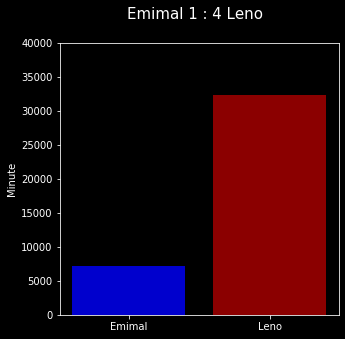

In [74]:
fig, axes = plt.subplots(figsize=(5, 5))
for i in range(len(emi['Season'])):
    axes.bar('Emimal',emi['Minute'][i], bottom=emi['Minute'][:i].sum(), color='mediumblue')
    
for i in range(len(leno['Season'])):
    axes.bar('Leno',leno['Minute'][i], bottom=leno['Minute'][:i].sum(),color="darkred")

fig.suptitle('Emimal 1 : 4 Leno',color='w', fontsize=15)

axes.set_ylim(0, 40000)
axes.set_ylim(0, 40000)
    
axes.set(xlabel='', ylabel='Minute')
# ax.legend(emi.index)
plt.show()

axes.figure.savefig('emi_leno_per.png')


In [75]:
emi['Minute'].sum() / 90

80.54444444444445

In [76]:
32304 / 7349

4.395700095251055

In [77]:
leno['Minute'].sum() / 90

358.93333333333334

In [78]:
emi_game = emi['Minute'].sum() / 90
leno_game = leno['Minute'].sum() / 90

In [79]:
minute = emi.loc[12,'Minute']
game = minute / 90
ep = 3 / game
minute = leno.loc[11,'Minute']
game = minute / 90
lp = 7 / game

In [80]:
lp

0.23782559456398641

In [81]:
ep

0.42857142857142855

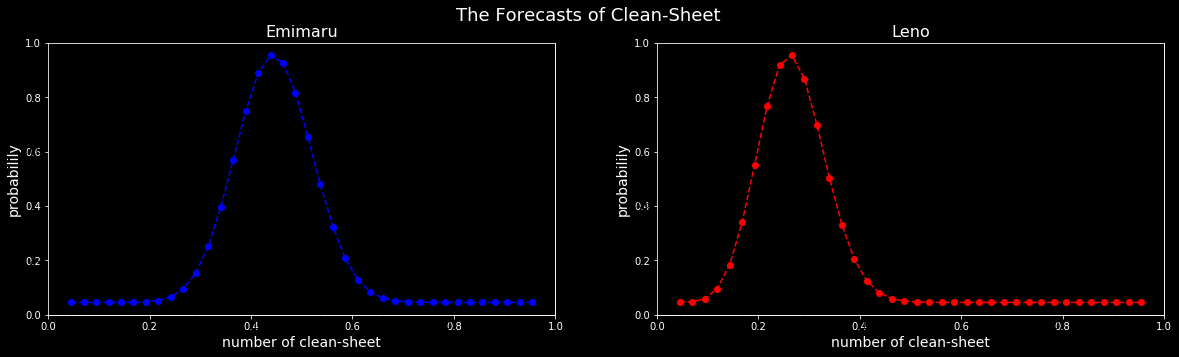

In [82]:

p = ep #クリーンシートする確率
n = 38 # 38節行う
x = range(38) # 38回で何回起こるかの分布がみたい

emi_binomial = binom.pmf(x,n,p)

leno_binomial = binom.pmf(x, n, lp)

fig, axes = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('The Forecasts of Clean-Sheet',color='w', fontsize=18)


axes[0].set_title('Emimaru',fontsize=16)
axes[1].set_title('Leno',fontsize=16)
axes[0].set_xlabel('number of clean-sheet',fontsize=14)
axes[0].set_ylabel('probabilily',fontsize=14)
axes[1].set_xlabel('number of clean-sheet', fontsize=14)
axes[1].set_ylabel('probabilily', fontsize=14)

Emimaru = fig.add_subplot(1, 2, 1)
Leno = fig.add_subplot(1, 2, 2)
 
Emimaru.plot(x, emi_binomial, 'bo--')
Leno.plot(x, leno_binomial, 'ro--')

# Emimaru.set_xticklabels([x for x in range(10)], rotation=55, ha="center")

# plt.tight_layout()

# 目盛りを隠してる
Emimaru.tick_params(direction = "inout", length = 5, colors = "black")
Leno.tick_params(direction = "inout", length = 5, colors = "black")

fig.savefig('emi_leno_clean.png')

In [83]:
emi_chart = pd.DataFrame({
    'Clean-Sheet%':emi['Clean-sheet %'], 'Save%':emi['Save %'], 
    'Against90':emi['Against90'],'PSXG':emi2['Psxg'],'PSNPXG':emi2['Psnpxg'],
    'Psxgper':emi2['Netper']
})
leno_chart = pd.DataFrame({
    'Clean-Sheet%':leno['Clean-sheet %'], 'Save%':leno['Save %'], 
    'Against90':leno['Against90'],'PSXG':leno['Psxg'],'PSNPXG':leno['Psnpxg'],
    'Psxgper':leno['Netper']
})

emi_c = pd.DataFrame(emi_chart.loc[11:, :])
emi_c['Name'] = ['emi', 'emi']
leno_c = pd.DataFrame(leno_chart.loc[11:, :])
leno_c['Name'] = ['leno', 'leno']

chart = emi_c.merge(leno_c,how='outer')
chart = chart.reindex(columns=['Name','Clean-Sheet%', 'Save%', 'Against90', 'PSXG', 'PSNPXG', 'Psxgper'])

In [84]:
chart = chart.drop('Name', axis=1)

In [85]:
chart.columns

Index(['Clean-Sheet%', 'Save%', 'Against90', 'PSXG', 'PSNPXG', 'Psxgper'], dtype='object')

In [86]:
ndarray = scipy.stats.zscore(chart, axis=0)
ndarray = ndarray * 10 + 70
ndarray

array([[71.31441145, 82.77013063, 53.28741956, 65.44342572, 67.17157288,
        83.36700808],
       [85.82847589, 62.48544659, 75.57086015, 65.17340651, 86.97056275,
        70.24303651],
       [60.79911986, 76.5003192 , 79.28476691, 87.17997264, 61.51471863,
        71.21518255],
       [62.0579928 , 58.24410357, 71.85695338, 62.20319513, 64.34314575,
        55.17477286]])

In [87]:
chart = pd.DataFrame(ndarray)
chart

,0,1,2,3,4,5
0,71.314411,82.770131,53.287420,65.443426,67.171573,83.367008
1,85.828476,62.485447,75.570860,65.173407,86.970563,70.243037
2,60.799120,76.500319,79.284767,87.179973,61.514719,71.215183
3,62.057993,58.244104,71.856953,62.203195,64.343146,55.174773


In [88]:
# chart[1] = chart[1] - 30
chart[2] = chart[2] - 40
# chart[3] = chart[3] - 20
# chart[4] = chart[4] - 10
# chart[5] = chart[5] - 15



chart

,0,1,2,3,4,5
0,71.314411,82.770131,13.287420,65.443426,67.171573,83.367008
1,85.828476,62.485447,35.570860,65.173407,86.970563,70.243037
2,60.799120,76.500319,39.284767,87.179973,61.514719,71.215183
3,62.057993,58.244104,31.856953,62.203195,64.343146,55.174773


In [89]:
e = chart.iloc[0:2,:].mean()
l = chart.iloc[1:4,:].mean()
chart = pd.DataFrame({'emi':e, 'leno':l})
chart = chart.T
chart
# chart = chart.reindex(columns=['Clean-Sheet%', 'Save%', 'Against90', 'PSXG', 'PSNPXG', 'Psxgper'])

,0,1,2,3,4,5
emi,78.571444,72.627789,24.42914,65.308416,77.071068,76.805022
leno,69.561863,65.743290,35.57086,71.518858,70.942809,65.544331


In [95]:
values = chart.iloc[1].tolist()

values += values[:1]
values

[69.56186285068209,
 65.74328978847245,
 35.57086014531156,
 71.51885809195845,
 70.94280904158207,
 65.54433064134965,
 69.56186285068209]

In [91]:
Attributes = ['Clean-Sheet', 'Save', 'Against90', 'PSXG', 'PSNPXG', 'Psxgper']
AttNo = len(Attributes)
Attributes

['Clean-Sheet', 'Save', 'Against90', 'PSXG', 'PSNPXG', 'Psxgper']

In [92]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles[:1]
angles

[0.0,
 1.0471975511965976,
 2.0943951023931953,
 3.141592653589793,
 4.1887902047863905,
 5.235987755982989,
 0.0]

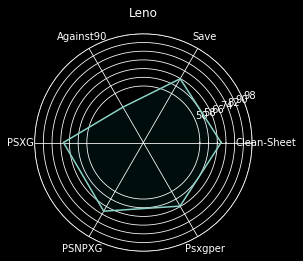

In [93]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)
ax.set_title("Leno")
ax.set_ylim(-2,2)
ax.set_yticks(np.arange(50,100,8))

plt.show()


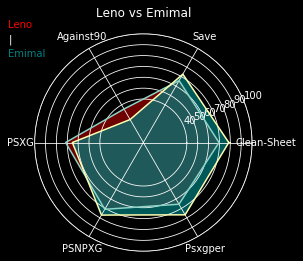

In [94]:
values2 = chart.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]


#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'darkred', alpha=0.8)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'teal', alpha=0.7)

ax.set_title("Leno vs Emimal")
ax.set_yticks(np.arange(40,110,10))

plt.figtext(0.2,0.9,"Leno",color="red")
plt.figtext(0.2,0.85,"|")
plt.figtext(0.2,0.8,"Emimal",color="teal")
plt.show()
ax.figure.savefig('emi_leno_rader.png')

In [25]:
premiar = pd.read_csv('../assets/league/premiar1920.csv')
home = premiar[(premiar['HomeTeam']=='Arsenal') & (premiar['FTAG']==0)]
# home = len(home)


away = premiar[(premiar['AwayTeam']=='Arsenal') & (premiar['FTHG']==0)]
# away = len(away)
# print(home, away)
away


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
8,E0,11/08/2019,14:00,Newcastle,Arsenal,0,1,A,0,0,...,2.05,0.25,1.99,1.91,1.99,1.95,2.17,1.97,2.00,1.89
170,E0,21/12/2019,12:30,Everton,Arsenal,0,0,D,0,0,...,2.53,-0.25,1.87,2.06,1.88,2.06,1.94,2.10,1.85,2.03
248,E0,02/02/2020,14:00,Burnley,Arsenal,0,0,D,0,0,...,2.06,0.50,1.96,1.97,1.97,1.96,1.99,2.00,1.93,1.94
308,E0,25/06/2020,18:00,Southampton,Arsenal,0,2,A,0,1,...,2.10,0.00,1.93,1.97,1.98,1.94,2.02,1.99,1.95,1.93
323,E0,04/07/2020,17:30,Wolves,Arsenal,0,2,A,0,1,...,1.61,-0.25,2.06,1.84,2.05,1.88,2.14,1.91,2.04,1.85


In [26]:
a_stats = arsenal_stats.reset_index(drop=True)

emi = a_stats.iloc[29:-1, :]
emi = [2,0,0,0,1,2,1,0]
emi_mean = np.mean(emi)
emi_mean

NameError: name 'arsenal_stats' is not defined

In [27]:
leno = a_stats.iloc[:29, :]

leno = [
    0,1,3,2,2,2,1,0,1,2,
    1,2,2,2,2,1,3,0,1,2,
    0,1,1,2,0,0,2,0,3
]
leno_mean = np.mean(leno)
leno_mean

NameError: name 'a_stats' is not defined

In [28]:
arsenal_stats = arsenal_stats.iloc[:29, :]
home = arsenal_stats[arsenal_stats['HomeTeam']=='Arsenal']

h = home['FTAG']
home_sum = h.sum()
home_sum

NameError: name 'arsenal_stats' is not defined

In [29]:
arsenal_leno = a_stats.iloc[29:, :]
away = arsenal_stats[arsenal_stats['AwayTeam']=='Arsenal']
a = away['FTAG']
away_sum = a.sum()
away_sum

NameError: name 'a_stats' is not defined